In [2]:
import h5py as h5;
import numpy as np;
import matplotlib.pyplot as plt;

In [46]:
filedir = '/share/data/'
filename = 'TES_Co57_Trig_D20201121_T153723_F0001.hdf5'
file = h5.File( filedir+filename )

ch_indices = file['adc1'].attrs['adc_channel_indices']
nb_samples = file['adc1'].attrs['nb_samples']
nb_events = file['adc1'].attrs['nb_events']
sample_rate = file['adc1'].attrs['sample_rate']
cal = file['adc1'].attrs['adc_conversion_factor']

print( file.attrs['comment'])

b'68 mK test TES chip with Co-57 source. Threshold-triggered. '


<ipython-input-46-b26e64019c86>:3: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  file = h5.File( filedir+filename )


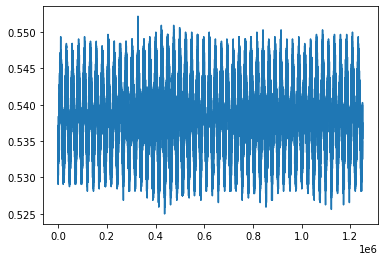

In [47]:
evt_index = 1

fig = plt.plot()

ch_index = 0;

Vcal = np.poly1d( cal[ch_index][::-1] )
event_name = 'event_%d' % evt_index
event = file['adc1'][event_name][ch_index]

plt.plot( Vcal(event) )
#axs[ch_index].plot( Vcal(event) )

In [9]:
ch_indices.size

1